# Machine Learning 

Machine learning (ML) is a subset of artificial intelligence that focuses on algorithms and statistical models enabling systems to learn patterns from data and make predictions or decisions without being explicitly programmed for each specific task. At its core, ML automates the discovery of relationships within data, using methods ranging from linear models and decision trees to deep neural networks and ensemble techniques. In financial data analytics, this capability allows analysts and systems to go beyond traditional econometric models by uncovering non-linear patterns, complex interactions, and subtle anomalies across large and high-frequency datasets.

The integration of machine learning into financial analytics is transforming how we forecast asset prices, manage risk, detect fraud, and construct portfolios. ML techniques are increasingly used for tasks such as algorithmic trading, credit scoring, sentiment analysis, and asset classification. Their strength lies in adapting to new data, learning from past market behavior, and improving predictive performance over time. This makes them highly valuable in dynamic environments like financial markets, where relationships between variables are often unstable and evolve rapidly.

However, applying machine learning to financial data also comes with specific challenges. Financial time series are notoriously noisy, non-stationary, and often suffer from limited sample sizes relative to the number of features—a condition known as the "curse of dimensionality." Moreover, models trained on past data risk overfitting and may fail to generalize to unseen market conditions. The interpretability of complex models also remains a concern, especially in regulated environments where transparency is critical. Addressing these challenges requires a careful balance between model complexity, regularization, domain knowledge, and robust validation procedures.

## Categories of Machine Learning and Their Use in Finance

Machine learning methods can be broadly categorized into **supervised**, **unsupervised**, and **reinforcement learning**. Each serves a different purpose and is suited to specific types of problems in financial analytics.

**Supervised learning** involves training a model on labeled data, where the input features and corresponding outcomes (e.g., asset returns, credit defaults) are known. This is particularly common in tasks like stock return prediction, risk classification, and credit scoring. Techniques such as linear regression, support vector machines, random forests, and neural networks fall into this category. The goal is to learn a mapping from inputs to outputs that generalizes well to new, unseen data.

**Unsupervised learning**, on the other hand, deals with unlabeled data. It seeks to discover the underlying structure or patterns in the data, such as clusters or principal components. In finance, unsupervised learning is often used for tasks like anomaly detection (e.g., identifying irregular transactions) and portfolio diversification through factor analysis or clustering of assets.

**Reinforcement learning** is less commonly used but has a large potential for tasks which demand repeated decision making over time, e.g., asset allocation during varying economic conditions. Here, an agent learns to make decisions by interacting with an environment and receiving feedback in the form of rewards or penalties. Over time, the agent improves its strategy to maximize cumulative reward, which can correspond to profit or risk-adjusted return.

In this chapter, we present a rather general introduction on principles of supervised and unsupervised learning. 

## Core Concepts of Supervised Learning

Supervised learning revolves around learning a function that maps input features to output labels using a dataset of labeled examples. Many supervised learning algorithms—whether linear models, decision trees, or neural networks—share common foundational concepts. These can be described in a general framework that highlights the structure, training, evaluation, and potential pitfalls of these models.

### Parametric Models

Most supervised learning methods assume a **parametric form** for the underlying relationship between inputs and outputs. Formally, we assume there exists a function $f(\mathbf{x}; \boldsymbol{\theta})$ that maps input features $\mathbf{x} \in \mathbb{R}^d$ to an output $\hat{y} \in \mathbb{R}$ (for regression) or a class probability (for classification), where $\boldsymbol{\theta}$ denotes the parameters of the model.

Examples:
- In linear regression, $f(\mathbf{x}; \boldsymbol{\theta}) = \mathbf{x}^\top \boldsymbol{\theta}$.
- In neural networks, $f(\mathbf{x}; \boldsymbol{\theta})$ is a composition of linear and nonlinear transformations defined by network layers.

### Training with a Loss Function

The parameters $\boldsymbol{\theta}$ are **calibrated** or estimated by minimizing a **loss function** that quantifies the error between the model's predictions and the true labels in the training data. For a dataset $\mathcal{D} = \{(\mathbf{x}_i, y_i)\}_{i=1}^n$, the empirical risk (average loss) is:

$$
\mathcal{L}(\boldsymbol{\theta}) = \frac{1}{n} \sum_{i=1}^n \ell(f(\mathbf{x}_i; \boldsymbol{\theta}), y_i)
$$

where $\ell(\cdot, \cdot)$ is the loss function, such as mean squared error (MSE) for regression or cross-entropy for classification.

### Generalization and Evaluation on Unseen Data

A well-trained model should **generalize** to new, unseen data—not just perform well on the training set. Generalization is typically evaluated using a **test set** or through **cross-validation**, where the model is assessed on samples not used during training. A key measure here is the **generalization error**, which estimates how the model will perform on truly out-of-sample data:

$$
\mathbb{E}_{(\mathbf{x}, y) \sim \mathcal{P}}[\ell(f(\mathbf{x}; \boldsymbol{\theta}), y)]
$$

where $\mathcal{P}$ is the true data-generating distribution, which is typically unknown.

### Overfitting and Model Flexibility

As models become more flexible or **complex**, they can fit the training data too closely—capturing not only the signal but also the noise. This phenomenon is known as **overfitting**. It manifests as low training error but high error on the test set. Flexible models (e.g., high-degree polynomials, deep neural networks) are particularly susceptible to this issue.

### Regularization

To combat overfitting, models can be **regularized** by adding a penalty term to the loss function that discourages overly complex solutions. A general form of regularized risk is:

$$
\mathcal{L}_{\text{reg}}(\boldsymbol{\theta}) = \mathcal{L}(\boldsymbol{\theta}) + \lambda \cdot \Omega(\boldsymbol{\theta})
$$

where $\Omega(\boldsymbol{\theta})$ is a regularization term (e.g., $\|\boldsymbol{\theta}\|_2^2$ for ridge regression, $\|\boldsymbol{\theta}\|_1$ for lasso) and $\lambda \geq 0$ controls the strength of regularization. Other ways for regularization exist as well, however, the idea is to "manipulate" the training process in order to avoid the model from adapting its predictions to specifically to the training data. 

### Hyperparameters and Model Tuning

Supervised learning models often include **hyperparameters**—settings that are not learned from the data directly but significantly influence model performance. Examples include:
- The regularization strength $\lambda$
- The learning rate in gradient-based optimization
- The number of layers in a neural network
- The depth of a decision tree

These hyperparameters are typically selected through **cross-validation** or **grid/random search**, balancing the trade-off between underfitting and overfitting.

This conceptual framework provides a unifying lens to understand and compare different supervised learning methods. Despite their diversity, many share this structure of parametric modeling, loss-based training, evaluation on unseen data, and strategies to ensure good generalization.

## Common Supervised Learning Tasks

Supervised learning typically deals with two main types of prediction problems: **regression** and **classification**. While both involve learning a function from inputs to outputs based on labeled data, the nature of the output variable determines the choice of task, model, and evaluation metric.

### Regression

In a **regression** task, the goal is to predict a continuous target variable $y \in \mathbb{R}$ given input features $\mathbf{x} \in \mathbb{R}^d$. The model learns a function $f(\mathbf{x}; \boldsymbol{\theta})$ that estimates the expected value of the target:

$$
\hat{y} = f(\mathbf{x}; \boldsymbol{\theta}) \approx \mathbb{E}[y \mid \mathbf{x}]
$$

Common applications of regression in finance include predicting stock returns, yield spreads, or volatility. The most frequently used loss function is the **mean squared error (MSE)**:

$$
\ell(f(\mathbf{x}), y) = (f(\mathbf{x}) - y)^2
$$

Other loss functions include the **mean absolute error (MAE)** or the **Huber loss**, which is more robust to outliers.

### Binary Classification

In **binary classification**, the target variable takes one of two possible labels, commonly represented as $y \in \{0, 1\}$. The model predicts a score $\hat{p} = f(\mathbf{x}; \boldsymbol{\theta}) \in [0, 1]$ that represents the estimated probability of class 1. The prediction can be thresholded at 0.5 (or another value) to make a hard classification:

$$
\hat{y} =
\begin{cases}
1 & \text{if } f(\mathbf{x}; \boldsymbol{\theta}) \geq 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

A common loss function is the **binary cross-entropy (log loss)**:

$$
\ell(f(\mathbf{x}), y) = -\left[ y \log f(\mathbf{x}) + (1 - y) \log(1 - f(\mathbf{x})) \right]
$$

Binary classification is widely used in finance for tasks like credit default prediction, fraud detection, and up/down movement forecasting.

### Multi-Class Classification

In **multi-class classification**, the target variable $y$ can take on one of $K > 2$ discrete values: $y \in \{1, 2, \dots, K\}$. The model outputs a probability distribution over the $K$ classes:

$$
\hat{\mathbf{p}} = f(\mathbf{x}; \boldsymbol{\theta}) \in \mathbb{R}^K, \quad \sum_{k=1}^K \hat{p}_k = 1
$$

The prediction is usually made by taking the class with the highest probability:

$$
\hat{y} = \arg \max_k \hat{p}_k
$$

The standard loss function is the **categorical cross-entropy**:

$$
\ell(f(\mathbf{x}), y) = - \log \hat{p}_y
$$

Multi-class classification appears in problems such as assigning financial documents to categories (e.g., ESG, earnings, macro), classifying market regimes, or tagging sentiment levels in financial news.

These three types of tasks—regression, binary classification, and multi-class classification—form the foundation of supervised learning applications in financial data analytics. Each task guides the choice of model architecture, loss function, evaluation metric, and interpretation of results.

## Examples of Supervised Learning Algorithms

Let us take a look at rather simple examples to develop a deeper understanding of the concepts discussed so far.

### A Single Parametric Model

To illustrate how supervised learning works in practice, we consider a very simple model: a **single-parameter linear function** of the form

$$
f(x; \theta) = \theta x
$$

This model maps a scalar input $x$ to an output using the parameter $\theta$, which we aim to learn from data. Despite its simplicity, this setup captures the essence of supervised learning: defining a model, choosing a loss function, optimizing parameters, and evaluating performance.

We will consider both **regression** and **binary classification** tasks using only two or three data points. This helps highlight how the loss function and the learning objective differ between tasks—even with the same model structure.

#### Regression Example

We are given input-output pairs $(x_i, y_i)$ and want to minimize the **mean squared error**:

$$
\mathcal{L}_{\text{reg}}(\theta) = \frac{1}{n} \sum_{i=1}^n (\theta x_i - y_i)^2
$$

#### Classification Example

For binary classification, the labels $y_i \in \{0, 1\}$ and we apply a sigmoid to map the output to a probability:

$$
f(x; \theta) = \sigma(\theta x), \quad \text{where } \sigma(z) = \frac{1}{1 + e^{-z}}
$$

We minimize the **binary cross-entropy** loss:

$$
\mathcal{L}_{\text{cls}}(\theta) = -\frac{1}{n} \sum_{i=1}^n \left[y_i \log(\sigma(\theta x_i)) + (1 - y_i) \log(1 - \sigma(\theta x_i))\right]
$$

Below is a simple example for both tasks with three data points.

Optimal theta (regression): 2.0500
Optimal theta (classification): 0.7325


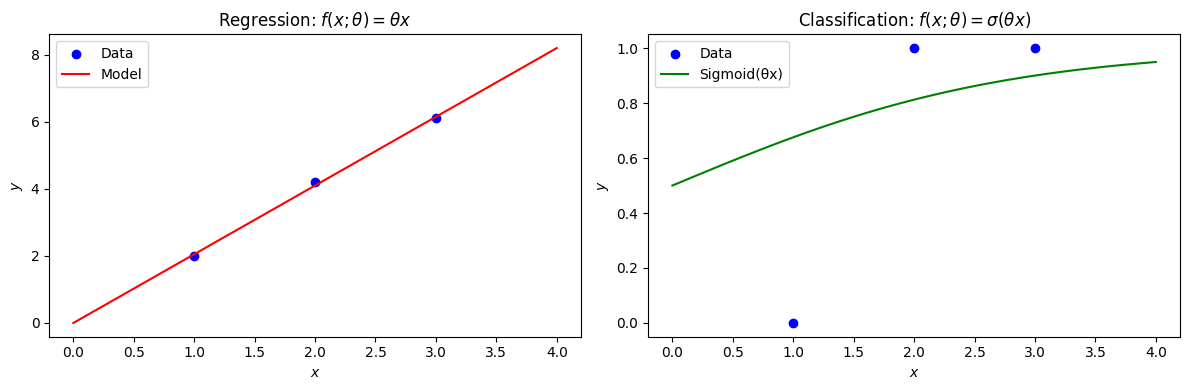

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import expit as sigmoid  # sigmoid function

# Sample data for regression and classification
x = np.array([1.0, 2.0, 3.0])
y_reg = np.array([2.0, 4.2, 6.1])          # regression targets
y_cls = np.array([0, 1, 1])                # binary classification targets

# Regression loss function
def regression_loss(theta):
    preds = theta * x
    return np.mean((preds - y_reg)**2)

# Classification loss function
def classification_loss(theta):
    preds = sigmoid(theta * x)
    eps = 1e-8  # for numerical stability
    return -np.mean(y_cls * np.log(preds + eps) + (1 - y_cls) * np.log(1 - preds + eps))

# Optimize regression
res_reg = minimize(regression_loss, x0=0.1)
theta_reg = res_reg.x[0]

# Optimize classification
res_cls = minimize(classification_loss, x0=0.1)
theta_cls = res_cls.x[0]

print(f"Optimal theta (regression): {theta_reg:.4f}")
print(f"Optimal theta (classification): {theta_cls:.4f}")

# Plotting
x_plot = np.linspace(0, 4, 100)
y_plot_reg = theta_reg * x_plot
y_plot_cls = sigmoid(theta_cls * x_plot)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Regression plot
axs[0].scatter(x, y_reg, color='blue', label='Data')
axs[0].plot(x_plot, y_plot_reg, color='red', label='Model')
axs[0].set_xlabel(r"$x$")
axs[0].set_ylabel(r"$y$")
axs[0].set_title("Regression: $f(x; \\theta) = \\theta x$")
axs[0].legend()

# Classification plot
axs[1].scatter(x, y_cls, color='blue', label='Data')
axs[1].plot(x_plot, y_plot_cls, color='green', label='Sigmoid(θx)')
axs[1].set_xlabel(r"$x$")
axs[1].set_ylabel(r"$y$")
axs[1].set_title("Classification: $f(x; \\theta) = \\sigma(\\theta x)$")
axs[1].legend()

plt.tight_layout()
plt.show()

#### Interpretation of Optimization Results

The optimization of the regression model using the loss function for mean squared error yields a value of $\theta$ that closely aligns with the observed data. Since the model is linear and the data approximately follow a linear relationship, the fit is nearly perfect. This demonstrates how a simple parametric model can effectively capture linear patterns when the underlying data are well-aligned with the model assumptions.

In contrast, the classification model—despite also being optimized using gradient-based methods—does not achieve perfect classification. Specifically, the first data point with label 0 is not confidently predicted as such. This is due to the use of a single parameter $\theta$ in combination with the sigmoid activation function, which maps inputs to probabilities. The model learns a global decision boundary that cannot perfectly separate all data points with such limited flexibility. This highlights a key limitation: even with an optimal loss, the model’s **capacity** may be insufficient to capture all patterns in the data—particularly when using simple, low-parameter models.

### Analytical vs. Numerical Optimization

In supervised learning, training a model involves finding the parameters that minimize a loss function. For **simple models** with a small number of parameters and well-behaved (usually convex) loss functions, it is sometimes possible to derive a **closed-form solution**—also called an **analytical solution**. A classic example is **ordinary least squares (OLS)** in linear regression, where the optimal parameters can be computed directly using matrix algebra:

$$
\boldsymbol{\theta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

This formula minimizes the mean squared error loss for a linear model and provides an exact solution without the need for iterative procedures.

However, as models become more **complex**—such as when they involve nonlinear functions (e.g., neural networks, decision trees) or non-convex loss landscapes—closed-form solutions no longer exist or are impractical to derive. In such cases, we rely on **numerical optimization methods**, the most common of which is **gradient descent** and its variants (e.g., stochastic gradient descent, Adam, RMSProp).

Gradient descent works by iteratively adjusting model parameters in the direction that reduces the loss, based on the **gradient** (or derivative) of the loss function with respect to the parameters. These methods are broadly applicable and form the backbone of modern machine learning, particularly in large-scale and deep learning applications.

In the examples above, we used numerical optimization to find the optimal value of a single parameter $\theta$. This approach is general and can be applied even when the loss function is not analytically tractable.

### Introduction to Gradient Descent

When analytical solutions are not available or feasible, we turn to **iterative optimization algorithms**—the most fundamental of which is **gradient descent**. Gradient descent is a first-order optimization algorithm that minimizes a loss function by iteratively moving in the direction of steepest descent, defined by the **negative gradient** of the loss function with respect to the model parameters.

The basic idea is simple: we start with an initial guess for the parameters, then repeatedly update them using the rule:

$$
\boldsymbol{\theta}^{(t+1)} = \boldsymbol{\theta}^{(t)} - \eta \nabla_{\boldsymbol{\theta}} \mathcal{L}(\boldsymbol{\theta}^{(t)})
$$

Here:
- $\boldsymbol{\theta}^{(t)}$ is the parameter value at iteration $t$
- $\eta$ is the **learning rate**, which controls the step size
- $\nabla_{\boldsymbol{\theta}} \mathcal{L}(\boldsymbol{\theta})$ is the gradient of the loss function

The gradient points in the direction of **increasing** loss, so subtracting it leads us downhill on the loss surface, toward a minimum. By repeating this update, we can converge to an optimal or near-optimal solution—even when the loss function is complex and nonlinear.

Gradient descent is widely used because it is:
- **Generic**: it works with nearly any differentiable loss function
- **Scalable**: it extends to high-dimensional parameter spaces
- **Customizable**: many variants exist (e.g., stochastic, mini-batch, momentum, Adam) for different use cases

This method is especially important in machine learning because many models, such as neural networks, are too complex for analytical solutions. In the next section, we’ll visualize how gradient descent works in our simple one-parameter model and build intuition for how it behaves during training.

### Visualizing Gradient Descent

To build intuition about how gradient descent works in practice, let us revisit our earlier example with the single-parameter model $f(x; \theta) = \theta x$ applied to both regression and classification tasks. Below, we plot the loss as a function of $\theta$ and overlay the **gradient descent steps** taken during optimization.

These visualizations illustrate the core behavior of gradient descent:

- The **x-axis** represents different values of $\theta$
- The **y-axis** shows the corresponding loss for each value
- The **blue/green curve** shows the entire loss landscape
- The **red dots** trace the path of gradient descent, starting from an initial guess and moving toward the minimum

#### Regression

In the regression example, the loss function is convex and smooth—typical for mean squared error with a linear model. Gradient descent moves smoothly and efficiently toward the minimum. Each step reduces the loss, and the size of each step shrinks naturally as the algorithm approaches the minimum.

This behavior highlights why convex problems are well-suited for gradient descent: the algorithm is guaranteed to find the global minimum (under appropriate conditions on the learning rate).

#### Classification

In the classification case, the loss landscape (binary cross-entropy combined with a sigmoid activation) is still smooth but no longer symmetric or perfectly convex. Gradient descent still makes consistent progress toward a minimum, but the steps vary more in size and the surface is slightly more curved. This reflects the **nonlinear transformation** introduced by the sigmoid function, which squashes inputs into probabilities between 0 and 1.

Despite the more complex surface, gradient descent still converges efficiently, demonstrating its robustness even in slightly nonlinear scenarios.

These plots provide a helpful mental image of what is happening "under the hood" when training machine learning models. In practice, these visual insights generalize to high-dimensional spaces, where gradient descent operates on parameter vectors rather than scalars—but the core principle remains the same.

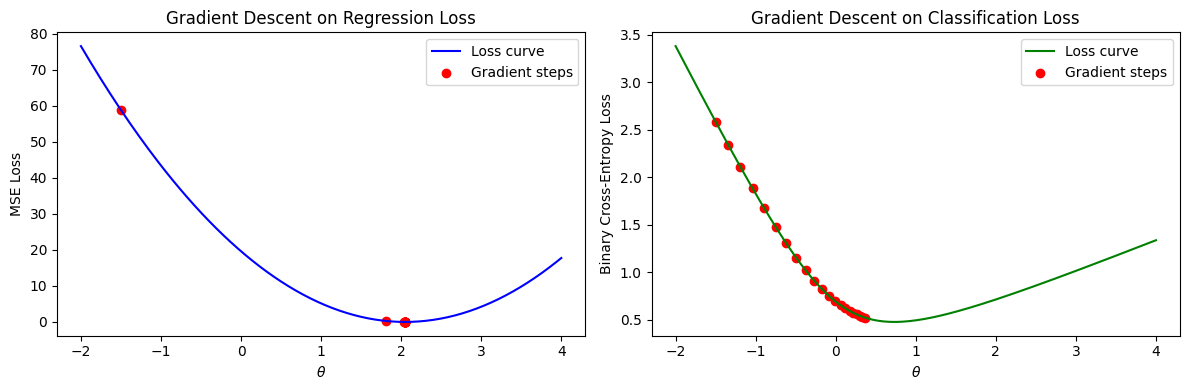

In [2]:
# Learning rate and initial guess
learning_rate = 0.1
theta_init = -1.5
n_steps = 20

# Store steps
theta_steps_reg = [theta_init]
theta_steps_cls = [theta_init]

# Gradient of regression loss
def grad_regression_loss(theta):
    preds = theta * x
    grad = 2 * np.mean((preds - y_reg) * x)
    return grad

# Gradient of classification loss
def grad_classification_loss(theta):
    z = theta * x
    preds = sigmoid(z)
    grad = np.mean((preds - y_cls) * x)
    return grad

# Simulate gradient descent
theta = theta_init
for _ in range(n_steps):
    theta -= learning_rate * grad_regression_loss(theta)
    theta_steps_reg.append(theta)

theta = theta_init
for _ in range(n_steps):
    theta -= learning_rate * grad_classification_loss(theta)
    theta_steps_cls.append(theta)


# Calculate loss values at each step
loss_steps_reg = [regression_loss(t) for t in theta_steps_reg]
loss_steps_cls = [classification_loss(t) for t in theta_steps_cls]

# Plotting the gradient descent steps
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Define range of theta values for plotting the loss curves
theta_vals = np.linspace(-2, 4, 200)

# Compute loss values for plotting the curves
loss_vals_reg = [regression_loss(t) for t in theta_vals]
loss_vals_cls = [classification_loss(t) for t in theta_vals]

# Regression gradient descent
axs[0].plot(theta_vals, loss_vals_reg, color='blue', label='Loss curve')
axs[0].scatter(theta_steps_reg, loss_steps_reg, color='red', label='Gradient steps')
axs[0].set_title("Gradient Descent on Regression Loss")
axs[0].set_xlabel("$\\theta$")
axs[0].set_ylabel("MSE Loss")
axs[0].legend()

# Classification gradient descent
axs[1].plot(theta_vals, loss_vals_cls, color='green', label='Loss curve')
axs[1].scatter(theta_steps_cls, loss_steps_cls, color='red', label='Gradient steps')
axs[1].set_title("Gradient Descent on Classification Loss")
axs[1].set_xlabel("$\\theta$")
axs[1].set_ylabel("Binary Cross-Entropy Loss")
axs[1].legend()

plt.tight_layout()
plt.show()

### Extending the Model: From One Parameter to $d$ Features

So far, we have examined a simple parametric model with just a single parameter: $f(x; \theta) = \theta x$. While this serves well for illustration, most real-world applications require handling **multiple input features**. To increase the model's flexibility, we generalize this to a **linear model** that can handle input vectors.

Let $\mathbf{x} \in \mathbb{R}^d$ be a $d$-dimensional feature vector and $\boldsymbol{\theta} \in \mathbb{R}^d$ be the corresponding parameter vector. The generalized linear model is:

$$
f(\mathbf{x}; \boldsymbol{\theta}) = \boldsymbol{\theta}^\top \mathbf{x} = \sum_{j=1}^d \theta_j x_j
$$

This model is **linear in the parameters**, but can capture much more complex relationships between features and outputs compared to the one-dimensional case.

#### Linear Regression (Multiple Features)

In the regression case, the model still tries to predict a continuous outcome $y \in \mathbb{R}$, and we minimize the **mean squared error** over all data points:

$$
\mathcal{L}_{\text{reg}}(\boldsymbol{\theta}) = \frac{1}{n} \sum_{i=1}^n \left( \boldsymbol{\theta}^\top \mathbf{x}_i - y_i \right)^2
$$

This model forms the foundation of **multiple linear regression**, and it can still be solved analytically:

$$
\boldsymbol{\theta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

where $\mathbf{X}$ is the matrix of stacked input vectors and $\mathbf{y}$ is the vector of targets.

#### Logistic Regression (Multiple Features)

For binary classification, we combine the linear model with the **sigmoid function** to map the output to a probability:

$$
f(\mathbf{x}; \boldsymbol{\theta}) = \sigma(\boldsymbol{\theta}^\top \mathbf{x}) = \frac{1}{1 + e^{-\boldsymbol{\theta}^\top \mathbf{x}}}
$$

The corresponding loss function is the **binary cross-entropy** over all samples:

$$
\mathcal{L}_{\text{cls}}(\boldsymbol{\theta}) = -\frac{1}{n} \sum_{i=1}^n \left[ y_i \log(\sigma(\boldsymbol{\theta}^\top \mathbf{x}_i)) + (1 - y_i) \log(1 - \sigma(\boldsymbol{\theta}^\top \mathbf{x}_i)) \right]
$$

Unlike linear regression, logistic regression **does not have a closed-form solution** for $\boldsymbol{\theta}$ and must be optimized using **numerical methods**, such as gradient descent.

This transition from a scalar input to a vector of features is a fundamental step toward building powerful machine learning models. It enables the model to capture richer patterns in the data and makes it suitable for real-world financial applications, where datasets often contain dozens or hundreds of relevant variables.

### Introducing Neural Networks: A Single Hidden Layer

To capture more complex patterns in data, it is often necessary to move beyond purely linear models. A **neural network** provides a structured framework for doing so by composing **non-linear transformations** of the input features. This section introduces the architecture and computation of a basic neural network with **a single hidden layer**.

#### A Single Neuron

A **neuron** in a neural network performs two operations:

**Affine Transformation**:

$$
z = \boldsymbol{w}^\top \mathbf{x} + b
$$

where $\mathbf{x} \in \mathbb{R}^d$ is the input vector, $\boldsymbol{w} \in \mathbb{R}^d$ is the weight vector, and $b \in \mathbb{R}$ is a bias term.

**Activation Function**:
$$
h = \phi(z)
$$

where $\phi(\cdot)$ is a non-linear activation function such as the ReLU ($\max(0, z)$), sigmoid, or hyperbolic tangent function. This non-linearity enables the model to approximate complex functions beyond linear decision boundaries.

See the figure below for a few common examples of activation function. It is up to the network architect to select an activation function. As you can see, they all share the charcteristic of non-linearity.

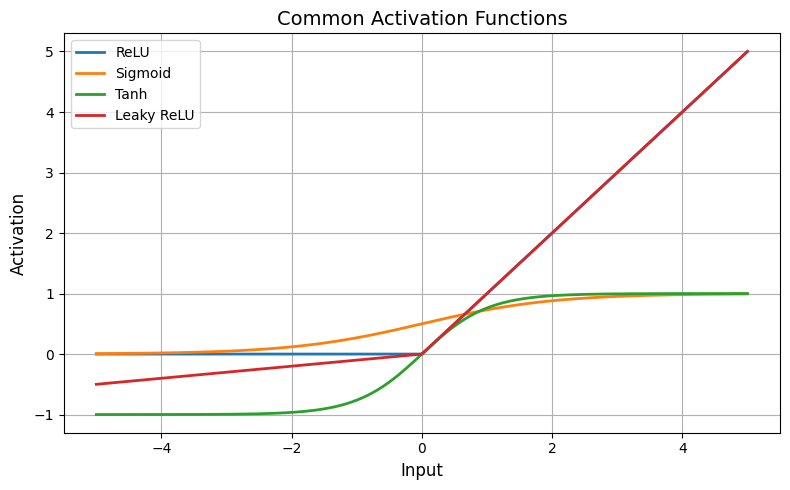

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
x = np.linspace(-5, 5, 500)
relu = np.maximum(0, x)
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)
leaky_relu = np.where(x > 0, x, 0.1 * x)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x, relu, label="ReLU", linewidth=2)
plt.plot(x, sigmoid, label="Sigmoid", linewidth=2)
plt.plot(x, tanh, label="Tanh", linewidth=2)
plt.plot(x, leaky_relu, label="Leaky ReLU", linewidth=2)

plt.title("Common Activation Functions", fontsize=14)
plt.xlabel("Input", fontsize=12)
plt.ylabel("Activation", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### Constructing the Hidden Layer

A **hidden layer** consists of multiple such neurons, each with its own weight vector and bias. Let $m$ denote the number of neurons in the hidden layer. The transformation from input to hidden layer is defined as:

$$
\mathbf{h} = \phi(\mathbf{W}^\top \mathbf{x} + \mathbf{b})
$$

where:
- $\mathbf{W} \in \mathbb{R}^{d \times m}$ is the weight matrix for the hidden layer,
- $\mathbf{b} \in \mathbb{R}^m$ is the vector of bias terms,
- $\phi(\cdot)$ is applied element-wise.

The output $\mathbf{h} \in \mathbb{R}^m$ is the **non-linear transformation** of the original input vector. These hidden features serve as an intermediate representation that can model interactions and non-linear patterns among the original features.

#### Output Layer: Regression or Classification

The output of the hidden layer is then passed to a final layer that performs either regression or classification. This layer is structured identically to the linear or logistic regression models, but instead of using the original input $\mathbf{x}$, it uses the hidden representation $\mathbf{h}$:

- For regression:

$$
\hat{y} = \boldsymbol{\theta}^\top \mathbf{h}
$$

- For binary classification:

$$
\hat{y} = \sigma(\boldsymbol{\theta}^\top \mathbf{h})
$$

Here, $\boldsymbol{\theta} \in \mathbb{R}^m$ is the output layer's weight vector, and $\sigma(\cdot)$ denotes the sigmoid function.

This architecture—an input layer, one hidden layer with non-linear activation, and an output layer—constitutes the simplest form of a **feedforward neural network**, also called a **single-layer perceptron**. It provides a foundation for more advanced architectures by enabling the model to learn **non-linear decision boundaries** and **interactions between features**, capabilities which are not available in standard linear models.

### A Note on Model Evaluation

Supervised learning models can be evaluated using a wide variety of **performance metrics**, and the choice of metric often depends on the **type of task** (regression vs. classification) and the **domain-specific goals**. For example, a model used in financial forecasting may prioritize error magnitudes, while a fraud detection model may focus on sensitivity or precision.

Although we won't explore these metrics in detail here, it is important to recognize that **evaluation is a critical step** in understanding a model’s effectiveness. The next chapter will introduce and illustrate a selection of commonly used metrics, providing examples for both regression and classification tasks.

## Introduction to Clustering

While supervised learning relies on labeled data to train models, **clustering** is a type of **unsupervised learning** that aims to discover **structure** within a dataset. The primary goal of clustering is to group data points into clusters such that points within the same cluster are more similar to each other than to those in other clusters. Clustering is widely used for exploratory data analysis, anomaly detection, segmentation, and preprocessing for other machine learning tasks.

### Key Characteristics of Clustering Algorithms

Despite their differences, most clustering algorithms share a few core characteristics:

- **Unlabeled Data**: Clustering works without any predefined labels. The algorithm must infer the grouping based solely on the input features.
  
- **Similarity-Based Grouping**: Clusters are formed by measuring similarity or distance between data points. Common distance measures include **Euclidean distance**, **Manhattan distance**, or **cosine similarity**, depending on the nature of the data.

- **Cluster Structure**: Clustering algorithms differ in the types of cluster shapes they can detect:
  - **Centroid-based methods** (e.g., k-means) assume spherical clusters centered around centroids.
  - **Density-based methods** (e.g., DBSCAN) detect arbitrary-shaped clusters based on point density.
  - **Hierarchical methods** (e.g., agglomerative clustering) build nested clusters by successively merging or splitting groups of points.

- **No Ground Truth**: Since clustering is unsupervised, there's often **no single correct answer**. Instead, the quality of a clustering result depends on the context, the data, and the choice of algorithm and parameters.

- **Scalability and Interpretability**: Some clustering methods (like k-means) are computationally efficient and easy to interpret, while others (like spectral clustering or Gaussian mixture models) offer more flexibility at the cost of increased complexity.

Clustering serves as a valuable first step in many data science workflows, especially when trying to understand the underlying structure of complex financial, behavioral, or high-dimensional data.

### Observations and Similarity in Clustering

At the heart of clustering lies the concept of **similarity** (or its inverse, **dissimilarity**) between observations. In order to group similar items together, we must first define a way to **quantify** how alike or different two observations are.

#### Observations as Feature Vectors

In clustering, each data point (or observation) is typically represented as a **feature vector** in a $d$-dimensional space:

$$
\mathbf{x}_i = [x_{i1}, x_{i2}, \dots, x_{id}]^\top \in \mathbb{R}^d
$$

Here:
- $n$ is the number of observations,
- $d$ is the number of features (or dimensions),
- $\mathbf{x}_i$ represents the $i$-th observation.

All clustering algorithms operate on such feature representations, and the choice of **distance metric** directly affects how clusters are formed.

### Distance and Similarity Measures

There are many ways to quantify similarity or distance between feature vectors. Two of the most common measures are **Euclidean distance** and **cosine dissimilarity**.

#### Euclidean Distance

The **Euclidean distance** between two observations $\mathbf{x}_i$ and $\mathbf{x}_j$ is defined as:

$$
\text{dist}_{\text{Euclidean}}(\mathbf{x}_i, \mathbf{x}_j) = \|\mathbf{x}_i - \mathbf{x}_j\|_2 = \sqrt{\sum_{k=1}^d (x_{ik} - x_{jk})^2}
$$

This is the straight-line distance between two points in Euclidean space. It is the default distance metric for algorithms like k-means.

#### Cosine Dissimilarity

The **cosine similarity** measures the **angle** between two vectors rather than their magnitude. It is defined as:

$$
\text{sim}_{\text{cosine}}(\mathbf{x}_i, \mathbf{x}_j) = \frac{\mathbf{x}_i^\top \mathbf{x}_j}{\|\mathbf{x}_i\| \cdot \|\mathbf{x}_j\|}
$$

This metric is particularly useful when the **direction** of the vector is more informative than its length—for example, in high-dimensional data such as document vectors or normalized financial indicators.

- A cosine similarity of 1 (i.e., dissimilarity of 0) means the vectors point in the same direction.
- A cosine similarity of 0 means the vectors are orthogonal (completely unrelated).
- A cosine similarity of -1 means the vectors point in opposite directions.

Choosing the right **distance metric** is crucial in clustering, as it fundamentally defines what it means for observations to be "similar." Some algorithms are sensitive to this choice, and the appropriate measure often depends on the scale, sparsity, and nature of the features.

Below are two visualizations to help build intuition for the two distance metrics:
-	Left Plot (Euclidean Distance): Shows three points in 2D space. The geometric distance between each pair of points represents their Euclidean distance. This is what clustering algorithms like k-means use to group nearby points.
-	Right Plot (Cosine Similarity): Plots the direction of each vector (normalized to unit length) from the origin. Cosine similarity measures the angle between these vectors, not their absolute position or magnitude. This is useful when direction is more important than size (e.g., in text or normalized data).

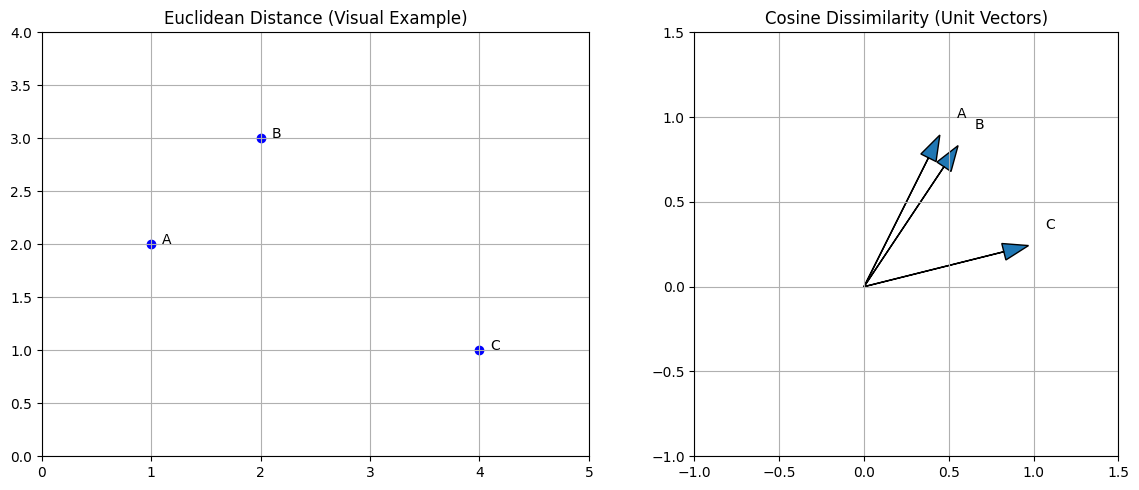

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances

# Create three example 2D points
points = np.array([
    [1, 2],  # A
    [2, 3],  # B
    [4, 1]   # C
])
labels = ['A', 'B', 'C']

# Compute pairwise distances
euclid_dists = euclidean_distances(points)
cosine_dists = cosine_distances(points)

# Plotting the points and annotate them
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot Euclidean distances
axs[0].scatter(points[:, 0], points[:, 1], color='blue')
for i, txt in enumerate(labels):
    axs[0].annotate(txt, (points[i, 0] + 0.1, points[i, 1]))

axs[0].set_title("Euclidean Distance (Visual Example)")
axs[0].set_xlim(0, 5)
axs[0].set_ylim(0, 4)
axs[0].grid(True)

# Plot vectors for cosine distance interpretation
origin = np.zeros(2)
for point, label in zip(points, labels):
    axs[1].arrow(*origin, *(point / np.linalg.norm(point)), head_width=0.1, length_includes_head=True)
    axs[1].annotate(label, point / np.linalg.norm(point) + 0.1)

axs[1].set_title("Cosine Dissimilarity (Unit Vectors)")
axs[1].set_xlim(-1, 1.5)
axs[1].set_ylim(-1, 1.5)
axs[1].set_aspect('equal')
axs[1].grid(True)

plt.tight_layout()
plt.show()

And this is how the euclidean distance matrix would look like

In [5]:
import pandas as pd

# Convert distance matrices to DataFrames for display
df_euclidean = pd.DataFrame(euclid_dists, index=labels, columns=labels)
df_cosine = pd.DataFrame(cosine_dists, index=labels, columns=labels)

df_euclidean

,A,B,C
A,0.000000,1.414214,3.162278
B,1.414214,0.000000,2.828427
C,3.162278,2.828427,0.000000


And the cosine dissimilarities which are defined by $\text{dissim}_{\text{cosine}}(\mathbf{x}_i, \mathbf{x}_j) = 1 - \text{sim}_{\text{cosine}}(\mathbf{x}_i, \mathbf{x}_j)$

In [6]:
df_cosine

,A,B,C
A,0.000000,0.007722,0.349209
B,0.007722,0.000000,0.260060
C,0.349209,0.260060,0.000000


### Understanding Hierarchical Clustering in Detail

We discuss hierarchical clustering as we show a financial application of it in the next chapter. **Hierarchical clustering** is a method that builds a hierarchy of nested clusters, offering both a clustering solution and a tree-like view of how clusters relate to each other. This approach is particularly useful for visualizing similarity structures in data, as it doesn't require specifying the number of clusters in advance.

We will focus here on the **agglomerative** (bottom-up) version of hierarchical clustering.

#### Step-by-Step: Agglomerative Clustering

1. **Start with each point as its own cluster**:
   Every observation is treated as an individual cluster. With $n$ data points, we begin with $n$ clusters.

2. **Compute the distance matrix**:
   Calculate the pairwise distances between all clusters using a chosen metric (e.g., Euclidean distance). Initially, these are just the distances between individual points.

3. **Merge the two closest clusters**:
   Find the pair of clusters with the smallest distance between them and merge them into a new cluster.

4. **Update the distance matrix**:
   After merging, recompute the distances between the new cluster and all other clusters. This step requires a **linkage criterion**, which defines how the distance between clusters is calculated. Common linkage methods include:
   - **Single linkage**: Minimum distance between any pair of points in the two clusters.
   - **Complete linkage**: Maximum distance between any pair of points.
   - **Average linkage**: Average of all pairwise distances between points in the clusters.
   - **Ward linkage**: Merges clusters based on minimizing the increase in within-cluster variance.

5. **Repeat**:
   Continue merging and updating distances until all data points are grouped into a single cluster.

#### Dendrogram: The Hierarchical Tree

The result of agglomerative clustering is a **dendrogram**, a binary tree structure where:
- Leaves represent individual observations,
- Branches represent cluster merges,
- The height of the branches indicates the distance (or dissimilarity) at which merges occurred.

By "cutting" the dendrogram at a chosen height, we can produce a flat clustering with a specified number of clusters.

In the figure below, you can see a minimum example with six observations and Ward linkage asa distance metric:
-	Left: The dendrogram from hierarchical clustering using Ward linkage. The height of the branches shows how far apart clusters are when they merge.
-	Right: A scatter plot of the original observations, labeled as $P_1$ to $P_6$, showing their true spatial relationships.

If we decide to split the data into two clusters, we cut the tree at the upper level and end up with a cluster including observations ($P_2, P_3, P_4$) and a cluster with observations ($P_1, P_5, P_6$).

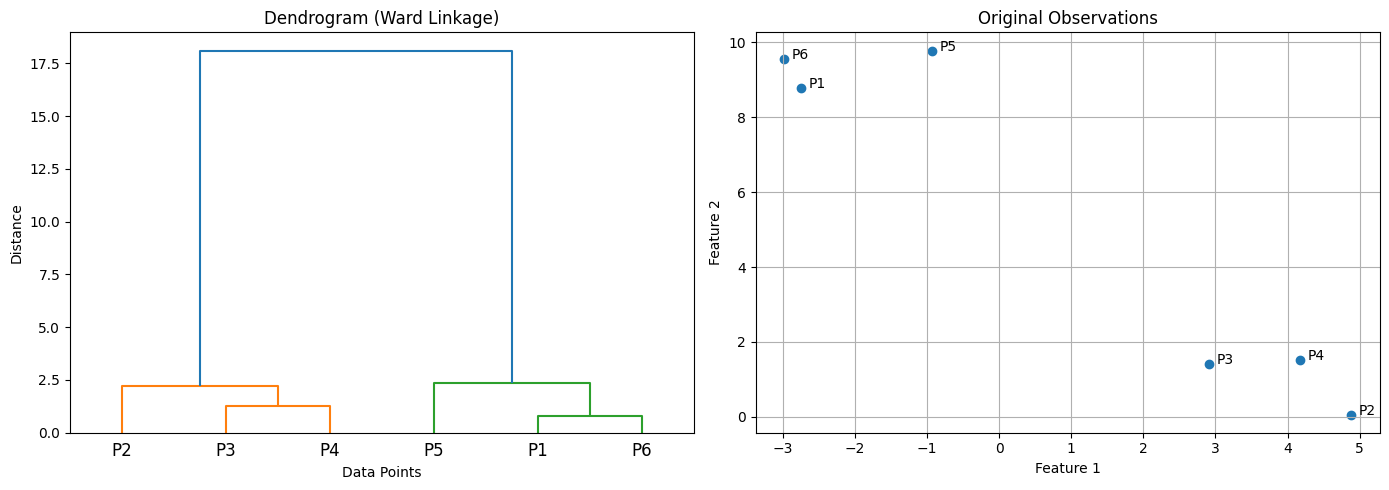

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=6, centers=2, cluster_std=1.0, random_state=42)

# Compute linkage matrix using different methods (we'll use 'ward' here)
linkage_matrix = linkage(X, method='ward')

# Create a subplot with dendrogram and scatter plot
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot dendrogram
dendrogram(linkage_matrix, labels=[f'P{i}' for i in range(1, 7)], ax=axs[0])
axs[0].set_title("Dendrogram (Ward Linkage)")
axs[0].set_xlabel("Data Points")
axs[0].set_ylabel("Distance")

# Scatter plot of original observations
axs[1].scatter(X[:, 0], X[:, 1], color='tab:blue')
for i, (x, y) in enumerate(X):
    axs[1].annotate(f'P{i+1}', (x + 0.1, y), fontsize=10)
axs[1].set_title("Original Observations")
axs[1].set_xlabel("Feature 1")
axs[1].set_ylabel("Feature 2")
axs[1].grid(True)

plt.tight_layout()
plt.show()

#### Advantages of Hierarchical Clustering

- **No need to specify number of clusters** ahead of time.
- Provides a full view of the data's nested structure.
- Flexible distance and linkage methods allow it to adapt to different data shapes.

#### Limitations

- **Computationally expensive** for large datasets.
- **Sensitive to noise and outliers**, especially with single linkage.

Hierarchical clustering is particularly useful for exploratory analysis in finance, bioinformatics, and text mining—anywhere the relationship structure is as important as the clustering itself. In the next section, we'll visualize a small example and explore how different linkage methods affect the result.

### Evaluating Clustering Results

Unlike supervised learning, clustering typically operates without labeled data, which makes **evaluation** more challenging. Still, it is essential to assess the **quality** and **usefulness** of the clustering. There are two broad types of clustering evaluation:

#### 1. Internal Evaluation

Internal metrics evaluate clustering based on the structure and cohesion of the resulting clusters **without requiring ground truth labels**. These metrics quantify how well the clusters are formed based on intra-cluster similarity and inter-cluster separation.

Common internal metrics:
- **Silhouette Score**: Combines cohesion (how close points in the same cluster are) and separation (how far apart clusters are). Values range from -1 to 1; higher is better.
- **Davies–Bouldin Index**: Measures the average "similarity" between each cluster and its most similar one. Lower values indicate better clustering.
- **Calinski–Harabasz Index**: Ratio of between-cluster dispersion to within-cluster dispersion. Higher values indicate better-defined clusters.

These metrics are useful for comparing clustering results with different algorithms or parameters (e.g., number of clusters $k$).

#### 2. External Evaluation (When Ground Truth Is Available)

When true labels are available (e.g., in a benchmarking dataset), external evaluation compares the clustering result to the actual labels.

Common external metrics:
- **Adjusted Rand Index (ARI)**: Measures the agreement between true and predicted clusterings, corrected for chance. Values range from -1 to 1.
- **Normalized Mutual Information (NMI)**: Measures shared information between predicted and true labels. Values range from 0 to 1.
- **Fowlkes–Mallows Index**: Based on pairwise comparison of data points. Higher values indicate better clustering.

Clustering evaluation is highly context-dependent. When no ground truth is available—as is often the case in financial or customer segmentation tasks—**internal metrics and domain expertise** are essential for assessing whether the clusters are meaningful and useful.